In [17]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))  # Should print "Tesla T4"

import cupy as cp
x = cp.random.rand(1000000)
print(x[:5])  # Should print random numbers
print(cp.cuda.Device(0))  # Correct
print(cp.cuda.Device(0).compute_capability)  # Prints CUDA compute capability

import jax
import jax.numpy as jnp
print(jax.devices())  # Should list GPU

True
Tesla T4
[0.50849212 0.36275047 0.24234594 0.25497743 0.4778429 ]
<CUDA Device 0>
75
[CudaDevice(id=0)]


In [18]:
import cupy as cp
import time

def estimate_pi_cupy(num_samples):
    start_time = time.time()

    x = cp.random.rand(num_samples)
    y = cp.random.rand(num_samples)

    inside_circle = cp.sum(x**2 + y**2 < 1)
    pi_estimate = (inside_circle * 4) / num_samples

    elapsed_time = time.time() - start_time
    return pi_estimate, elapsed_time

# Run benchmark
num_samples = 10_000_000
pi_cupy, time_cupy = estimate_pi_cupy(num_samples)
print(f"(CuPy) Estimated Pi: {pi_cupy:.8f} | Time: {time_cupy:.4f}s")

(CuPy) Estimated Pi: 3.14123960 | Time: 1.6664s


In [20]:
import jax.numpy as jnp
from jax import random
import time

def estimate_pi_jax(num_samples):
    start_time = time.time()

    key = random.PRNGKey(0)
    x = random.uniform(key, (num_samples,))
    y = random.uniform(key, (num_samples,))

    inside_circle = jnp.sum(x**2 + y**2 < 1)
    pi_estimate = (inside_circle * 4) / num_samples

    elapsed_time = time.time() - start_time
    return pi_estimate, elapsed_time

# Run benchmark
num_samples = 10_000_000
pi_jax, time_jax = estimate_pi_jax(num_samples)
print(f"(JAX) Estimated Pi: {pi_jax:.8f} | Time: {time_jax:.4f}s")

(JAX) Estimated Pi: 2.82873654 | Time: 1.7720s


In [25]:
import time
import cupy as cp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# 1. CuPy GPU-based Monte Carlo Pi estimation
def estimate_pi_cupy(num_samples):
    start_time = time.time()
    x = cp.random.random(num_samples)
    y = cp.random.random(num_samples)
    count = cp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# 2. JAX GPU-based Monte Carlo Pi estimation
def estimate_pi_jax(num_samples):
    start_time = time.time()
    key = jax.random.PRNGKey(0)
    x = jax.random.uniform(key, (num_samples,))
    y = jax.random.uniform(key, (num_samples,))
    count = jnp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# Benchmarking sample sizes
sample_sizes = [10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000, 50_000_000, 100_000_000, 500_000_000, 1_000_000_000]
cupy_times, jax_times = [], []

for num_samples in sample_sizes:
    print(f"\nRunning benchmarks for {num_samples} samples...")

    print(f"Running CuPy...")
    pi_cupy, time_cupy = estimate_pi_cupy(num_samples)
    print(f"(CuPy) Estimated Pi: {pi_cupy:.8f} | Time: {time_cupy:.4f}s")

    print(f"Running JAX...")
    pi_jax, time_jax = estimate_pi_jax(num_samples)
    print(f"(JAX) Estimated Pi: {pi_jax:.8f} | Time: {time_jax:.4f}s")

    cupy_times.append(time_cupy)
    jax_times.append(time_jax)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, cupy_times, marker='o', linestyle='-', label="CuPy GPU")
plt.plot(sample_sizes, jax_times, marker='s', linestyle='-', label="JAX GPU")
plt.xlabel("Number of Samples")
plt.ylabel("Execution Time (seconds)")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.title("GPU Performance Comparison: CuPy vs JAX")
plt.show()


Running benchmarks for 10000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.15200000 | Time: 0.0023s
Running JAX...
(JAX) Estimated Pi: 2.81480002 | Time: 0.0037s

Running benchmarks for 50000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14264000 | Time: 0.0014s
Running JAX...
(JAX) Estimated Pi: 2.83719993 | Time: 0.0033s

Running benchmarks for 100000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14052000 | Time: 0.0026s
Running JAX...
(JAX) Estimated Pi: 2.82047987 | Time: 0.0030s

Running benchmarks for 500000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.13886400 | Time: 0.0041s
Running JAX...
(JAX) Estimated Pi: 2.82823992 | Time: 0.0032s

Running benchmarks for 1000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14324000 | Time: 0.0074s
Running JAX...
(JAX) Estimated Pi: 2.82880402 | Time: 0.0034s

Running benchmarks for 5000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14178080 | Time: 0.0279s
Running JAX...
(JAX) Estimated Pi: 2.83014488 | Time: 

MemoryError: std::bad_alloc: out_of_memory: CUDA error at: /tmp/pip-build-env-m_qegmhe/normal/lib/python3.11/site-packages/librmm/include/rmm/mr/device/cuda_memory_resource.hpp:62: cudaErrorMemoryAllocation out of memory

In [26]:
import time
import cupy as cp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Enable CuPy memory pooling to optimize GPU memory usage
cp.cuda.set_allocator(cp.cuda.MemoryPool().malloc)

# 1. CuPy GPU-based Monte Carlo Pi estimation
def estimate_pi_cupy(num_samples):
    start_time = time.time()
    x = cp.random.random(num_samples)
    y = cp.random.random(num_samples)
    count = cp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# 2. JAX GPU-based Monte Carlo Pi estimation
def estimate_pi_jax(num_samples):
    start_time = time.time()
    key = jax.random.PRNGKey(0)
    x = jax.random.uniform(key, (num_samples,))
    y = jax.random.uniform(key, (num_samples,))
    count = jnp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# Benchmarking sample sizesimport time
import cupy as cp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Enable CuPy memory pooling to optimize GPU memory usage
cp.cuda.set_allocator(cp.cuda.MemoryPool().malloc)

# 1. CuPy GPU-based Monte Carlo Pi estimation
def estimate_pi_cupy(num_samples):
    start_time = time.time()
    x = cp.random.random(num_samples)
    y = cp.random.random(num_samples)
    count = cp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# 2. JAX GPU-based Monte Carlo Pi estimation
def estimate_pi_jax(num_samples):
    start_time = time.time()
    key = jax.random.PRNGKey(0)
    x = jax.random.uniform(key, (num_samples,))
    y = jax.random.uniform(key, (num_samples,))
    count = jnp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# Benchmarking sample sizes
import time
import cupy as cp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Enable CuPy memory pooling to optimize GPU memory usage
cp.cuda.set_allocator(cp.cuda.MemoryPool().malloc)

# 1. CuPy GPU-based Monte Carlo Pi estimation
def estimate_pi_cupy(num_samples):
    start_time = time.time()
    x = cp.random.random(num_samples)
    y = cp.random.random(num_samples)
    count = cp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# 2. JAX GPU-based Monte Carlo Pi estimation
def estimate_pi_jax(num_samples):
    start_time = time.time()
    key = jax.random.PRNGKey(0)
    x = jax.random.uniform(key, (num_samples,))
    y = jax.random.uniform(key, (num_samples,))
    count = jnp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# Benchmarking sample sizes
import time
import cupy as cp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Enable CuPy memory pooling to optimize GPU memory usage
cp.cuda.set_allocator(cp.cuda.MemoryPool().malloc)

# 1. CuPy GPU-based Monte Carlo Pi estimation
def estimate_pi_cupy(num_samples):
    start_time = time.time()
    x = cp.random.random(num_samples)
    y = cp.random.random(num_samples)
    count = cp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# 2. JAX GPU-based Monte Carlo Pi estimation
def estimate_pi_jax(num_samples):
    start_time = time.time()
    key = jax.random.PRNGKey(0)
    x = jax.random.uniform(key, (num_samples,))
    y = jax.random.uniform(key, (num_samples,))
    count = jnp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# Benchmarking sample sizes
import time
import cupy as cp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Enable CuPy memory pooling to optimize GPU memory usage
cp.cuda.set_allocator(cp.cuda.MemoryPool().malloc)

# 1. CuPy GPU-based Monte Carlo Pi estimation
def estimate_pi_cupy(num_samples):
    start_time = time.time()
    x = cp.random.random(num_samples)
    y = cp.random.random(num_samples)
    count = cp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# 2. JAX GPU-based Monte Carlo Pi estimation
def estimate_pi_jax(num_samples):
    start_time = time.time()
    key = jax.random.PRNGKey(0)
    x = jax.random.uniform(key, (num_samples,))
    y = jax.random.uniform(key, (num_samples,))
    count = jnp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# Benchmarking sample sizes
sample_sizes = [10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000, 50_000_000, 100_000_000, 500_000_000, 1_000_000_000]
cupy_times, jax_times = [], []

for num_samples in sample_sizes:
    print(f"\nRunning benchmarks for {num_samples} samples...")

    print(f"Running CuPy...")
    pi_cupy, time_cupy = estimate_pi_cupy(num_samples)
    print(f"(CuPy) Estimated Pi: {pi_cupy:.8f} | Time: {time_cupy:.4f}s")

    print(f"Running JAX...")
    pi_jax, time_jax = estimate_pi_jax(num_samples)
    print(f"(JAX) Estimated Pi: {pi_jax:.8f} | Time: {time_jax:.4f}s")

    cupy_times.append(time_cupy)
    jax_times.append(time_jax)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, cupy_times, marker='o', linestyle='-', label="CuPy GPU")
plt.plot(sample_sizes, jax_times, marker='s', linestyle='-', label="JAX GPU")
plt.xlabel("Number of Samples")
plt.ylabel("Execution Time (seconds)")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.title("GPU Performance Comparison: CuPy vs JAX")
plt.show()



Running benchmarks for 10000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.16120000 | Time: 0.0021s
Running JAX...
(JAX) Estimated Pi: 2.81480002 | Time: 0.0040s

Running benchmarks for 50000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.13408000 | Time: 0.0025s
Running JAX...
(JAX) Estimated Pi: 2.83719993 | Time: 0.0029s

Running benchmarks for 100000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14860000 | Time: 0.0021s
Running JAX...
(JAX) Estimated Pi: 2.82047987 | Time: 0.0031s

Running benchmarks for 500000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.13996000 | Time: 0.0023s
Running JAX...
(JAX) Estimated Pi: 2.82823992 | Time: 0.0030s

Running benchmarks for 1000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14006000 | Time: 0.0024s
Running JAX...
(JAX) Estimated Pi: 2.82880402 | Time: 0.0032s

Running benchmarks for 5000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14243200 | Time: 0.0027s
Running JAX...
(JAX) Estimated Pi: 2.83014488 | Time: 

OutOfMemoryError: Out of memory allocating 400,000,000 bytes (allocated so far: 1,600,000,000 bytes).

In [30]:
import time
import cupy as cp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Enable CuPy memory pooling to optimize GPU memory usage
cp.cuda.set_allocator(cp.cuda.MemoryPool().malloc)

# 1. CuPy GPU-based Monte Carlo Pi estimation with chunking
def estimate_pi_cupy(num_samples, chunk_size=10_000_000):
    start_time = time.time()
    count = 0
    for _ in range(0, num_samples, chunk_size):
        chunk = min(chunk_size, num_samples - _)
        x = cp.random.random(chunk)
        y = cp.random.random(chunk)
        count += cp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# 2. JAX GPU-based Monte Carlo Pi estimation
def estimate_pi_jax(num_samples):
    start_time = time.time()
    key = jax.random.PRNGKey(0)
    x = jax.random.uniform(key, (num_samples,))
    y = jax.random.uniform(key, (num_samples,))
    count = jnp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# Benchmarking sample sizes
sample_sizes = [10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000, 50_000_000, 100_000_000, 500_000_000, 1_000_000_000]
cupy_times, jax_times = [], []

for num_samples in sample_sizes:
    print(f"\nRunning benchmarks for {num_samples} samples...")

    print(f"Running CuPy...")
    pi_cupy, time_cupy = estimate_pi_cupy(num_samples)
    print(f"(CuPy) Estimated Pi: {pi_cupy:.8f} | Time: {time_cupy:.4f}s")

    print(f"Running JAX...")
    pi_jax, time_jax = estimate_pi_jax(num_samples)
    print(f"(JAX) Estimated Pi: {pi_jax:.8f} | Time: {time_jax:.4f}s")

    cupy_times.append(time_cupy)
    jax_times.append(time_jax)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, cupy_times, marker='o', linestyle='-', label="CuPy GPU")
plt.plot(sample_sizes, jax_times, marker='s', linestyle='-', label="JAX GPU")
plt.xlabel("Number of Samples")
plt.ylabel("Execution Time (seconds)")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.title("GPU Performance Comparison: CuPy vs JAX")
plt.show()


Running benchmarks for 10000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14680000 | Time: 0.0019s
Running JAX...
(JAX) Estimated Pi: 2.81480002 | Time: 0.0038s

Running benchmarks for 50000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.13528000 | Time: 0.0021s
Running JAX...
(JAX) Estimated Pi: 2.83719993 | Time: 0.0036s

Running benchmarks for 100000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14080000 | Time: 0.0012s
Running JAX...
(JAX) Estimated Pi: 2.82047987 | Time: 0.0032s

Running benchmarks for 500000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.13988000 | Time: 0.0023s
Running JAX...
(JAX) Estimated Pi: 2.82823992 | Time: 0.0027s

Running benchmarks for 1000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14516400 | Time: 0.0023s
Running JAX...
(JAX) Estimated Pi: 2.82880402 | Time: 0.0027s

Running benchmarks for 5000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14203120 | Time: 0.0025s
Running JAX...
(JAX) Estimated Pi: 2.83014488 | Time: 

ValueError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 400000000 bytes.

In [32]:
import time
import cupy as cp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Enable CuPy memory pooling to optimize GPU memory usage
cp.cuda.set_allocator(cp.cuda.MemoryPool().malloc)

# 1. CuPy GPU-based Monte Carlo Pi estimation with chunking
def estimate_pi_cupy(num_samples, chunk_size=10_000_000):
    start_time = time.time()
    count = 0
    for _ in range(0, num_samples, chunk_size):
        chunk = min(chunk_size, num_samples - _)
        x = cp.random.random(chunk)
        y = cp.random.random(chunk)
        count += cp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# 2. JAX GPU-based Monte Carlo Pi estimation with chunking
def estimate_pi_jax(num_samples, chunk_size=10_000_000):
    start_time = time.time()
    count = 0
    key = jax.random.PRNGKey(0)

    for _ in range(0, num_samples, chunk_size):
        chunk = min(chunk_size, num_samples - _)
        subkey, key = jax.random.split(key)
        x = jax.random.uniform(subkey, (chunk,))
        y = jax.random.uniform(subkey, (chunk,))
        count += jnp.sum(x**2 + y**2 < 1)

    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# Benchmarking sample sizes
sample_sizes = [10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000, 50_000_000, 100_000_000, 500_000_000, 1_000_000_000, 5_000_000_000, 10_000_000_000]
cupy_times, jax_times = [], []

for num_samples in sample_sizes:
    print(f"\nRunning benchmarks for {num_samples} samples...")

    print(f"Running CuPy...")
    pi_cupy, time_cupy = estimate_pi_cupy(num_samples)
    print(f"(CuPy) Estimated Pi: {pi_cupy:.8f} | Time: {time_cupy:.4f}s")

    print(f"Running JAX...")
    pi_jax, time_jax = estimate_pi_jax(num_samples)
    print(f"(JAX) Estimated Pi: {pi_jax:.8f} | Time: {time_jax:.4f}s")

    cupy_times.append(time_cupy)
    jax_times.append(time_jax)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, cupy_times, marker='o', linestyle='-', label="CuPy GPU")
plt.plot(sample_sizes, jax_times, marker='s', linestyle='-', label="JAX GPU")
plt.xlabel("Number of Samples")
plt.ylabel("Execution Time (seconds)")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.title("GPU Performance Comparison: CuPy vs JAX (With Chunking)")
plt.show()


Running benchmarks for 10000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.13320000 | Time: 0.0023s
Running JAX...
(JAX) Estimated Pi: 2.85400009 | Time: 0.0051s

Running benchmarks for 50000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.15048000 | Time: 0.0023s
Running JAX...
(JAX) Estimated Pi: 2.82991982 | Time: 0.0037s

Running benchmarks for 100000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14612000 | Time: 0.0022s
Running JAX...
(JAX) Estimated Pi: 2.83179998 | Time: 0.0045s

Running benchmarks for 500000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14094400 | Time: 0.0020s
Running JAX...
(JAX) Estimated Pi: 2.82840800 | Time: 0.0046s

Running benchmarks for 1000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14090400 | Time: 0.0033s
Running JAX...
(JAX) Estimated Pi: 2.83017588 | Time: 0.0049s

Running benchmarks for 5000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14140400 | Time: 0.0023s
Running JAX...
(JAX) Estimated Pi: 2.82743526 | Time: 

OverflowError: An overflow was encountered while parsing an argument to a jitted computation, whose argument path is x2.

In [33]:
import time
import cupy as cp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Enable CuPy memory pooling to optimize GPU memory usage
cp.cuda.set_allocator(cp.cuda.MemoryPool().malloc)

# 1. CuPy GPU-based Monte Carlo Pi estimation with chunking
def estimate_pi_cupy(num_samples, chunk_size=10_000_000):
    start_time = time.time()
    count = 0
    for _ in range(0, num_samples, chunk_size):
        chunk = min(chunk_size, num_samples - _)
        x = cp.random.random(chunk)
        y = cp.random.random(chunk)
        count += cp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# 2. JAX GPU-based Monte Carlo Pi estimation with chunking
def estimate_pi_jax(num_samples, chunk_size=10_000_000):
    start_time = time.time()
    count = 0
    key = jax.random.PRNGKey(0)

    for _ in range(0, num_samples, chunk_size):
        chunk = min(chunk_size, num_samples - _)
        subkey, key = jax.random.split(key)
        x = jax.random.uniform(subkey, (chunk,))
        y = jax.random.uniform(subkey, (chunk,))
        # Explicitly cast to int64 to avoid overflow
        count += jnp.sum(x**2 + y**2 < 1, dtype=jnp.int64)

    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# Benchmarking sample sizes
sample_sizes = [10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000, 50_000_000, 100_000_000, 500_000_000, 1_000_000_000, 5_000_000_000, 10_000_000_000]
cupy_times, jax_times = [], []

for num_samples in sample_sizes:
    print(f"\nRunning benchmarks for {num_samples} samples...")

    print(f"Running CuPy...")
    pi_cupy, time_cupy = estimate_pi_cupy(num_samples)
    print(f"(CuPy) Estimated Pi: {pi_cupy:.8f} | Time: {time_cupy:.4f}s")

    print(f"Running JAX...")
    pi_jax, time_jax = estimate_pi_jax(num_samples)
    print(f"(JAX) Estimated Pi: {pi_jax:.8f} | Time: {time_jax:.4f}s")

    cupy_times.append(time_cupy)
    jax_times.append(time_jax)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, cupy_times, marker='o', linestyle='-', label="CuPy GPU")
plt.plot(sample_sizes, jax_times, marker='s', linestyle='-', label="JAX GPU")
plt.xlabel("Number of Samples")
plt.ylabel("Execution Time (seconds)")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.title("GPU Performance Comparison: CuPy vs JAX (With Chunking)")
plt.show()


Running benchmarks for 10000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.13680000 | Time: 0.0045s
Running JAX...
(JAX) Estimated Pi: 2.85400009 | Time: 0.0526s

Running benchmarks for 50000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.15136000 | Time: 0.0013s
Running JAX...
(JAX) Estimated Pi: 2.82991982 | Time: 0.0547s

Running benchmarks for 100000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.13796000 | Time: 0.0015s
Running JAX...
(JAX) Estimated Pi: 2.83179998 | Time: 0.0582s

Running benchmarks for 500000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14362400 | Time: 0.0019s
Running JAX...


/usr/local/lib/python3.11/dist-packages/jax/_src/numpy/reductions.py:213: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in sum is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return _reduction(a, "sum", np.sum, lax.add, 0, preproc=_cast_to_numeric,


(JAX) Estimated Pi: 2.82840800 | Time: 0.0753s

Running benchmarks for 1000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14163600 | Time: 0.0019s
Running JAX...
(JAX) Estimated Pi: 2.83017588 | Time: 0.0711s

Running benchmarks for 5000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14178480 | Time: 0.0022s
Running JAX...
(JAX) Estimated Pi: 2.82743526 | Time: 0.0812s

Running benchmarks for 10000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14140600 | Time: 0.0045s
Running JAX...
(JAX) Estimated Pi: 2.82933211 | Time: 0.0813s

Running benchmarks for 50000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14172552 | Time: 0.0066s
Running JAX...
(JAX) Estimated Pi: 2.82858920 | Time: 0.0160s

Running benchmarks for 100000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14187852 | Time: 0.0041s
Running JAX...
(JAX) Estimated Pi: 2.82838011 | Time: 0.0329s

Running benchmarks for 500000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14159902 | Time: 0.0

OverflowError: An overflow was encountered while parsing an argument to a jitted computation, whose argument path is x2.


Running benchmarks for 10000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.10560000 | Time: 0.0020s
Running JAX...
(JAX) Estimated Pi: 2.85400000 | Time: 0.0047s

Running benchmarks for 50000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14848000 | Time: 0.0024s
Running JAX...
(JAX) Estimated Pi: 2.82992000 | Time: 0.0035s

Running benchmarks for 100000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.13592000 | Time: 0.0019s
Running JAX...
(JAX) Estimated Pi: 2.83180000 | Time: 0.0044s

Running benchmarks for 500000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14314400 | Time: 0.0018s
Running JAX...
(JAX) Estimated Pi: 2.82840800 | Time: 0.0061s

Running benchmarks for 1000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14300800 | Time: 0.0018s
Running JAX...
(JAX) Estimated Pi: 2.83017600 | Time: 0.0051s

Running benchmarks for 5000000 samples...
Running CuPy...
(CuPy) Estimated Pi: 3.14010720 | Time: 0.0022s
Running JAX...
(JAX) Estimated Pi: 2.82743520 | Time: 

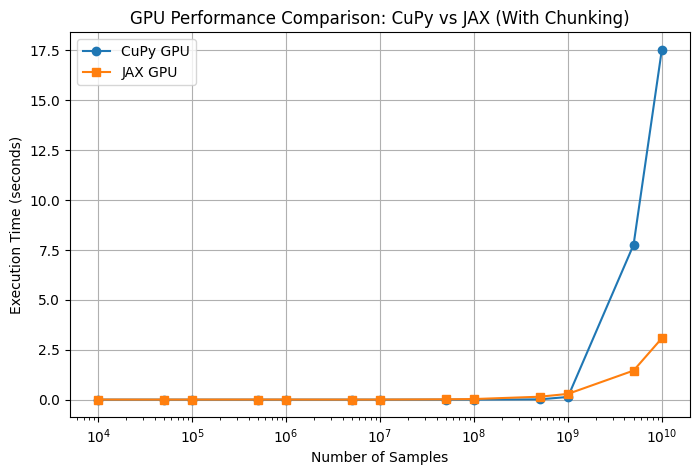

In [34]:
import time
import cupy as cp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Enable CuPy memory pooling to optimize GPU memory usage
cp.cuda.set_allocator(cp.cuda.MemoryPool().malloc)

# 1. CuPy GPU-based Monte Carlo Pi estimation with chunking
def estimate_pi_cupy(num_samples, chunk_size=10_000_000):
    start_time = time.time()
    count = 0
    for _ in range(0, num_samples, chunk_size):
        chunk = min(chunk_size, num_samples - _)
        x = cp.random.random(chunk)
        y = cp.random.random(chunk)
        count += cp.sum(x**2 + y**2 < 1)
    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# 2. JAX GPU-based Monte Carlo Pi estimation with chunking
def estimate_pi_jax(num_samples, chunk_size=10_000_000):
    start_time = time.time()
    count = 0  # Initialize count as an int64
    key = jax.random.PRNGKey(0)

    for _ in range(0, num_samples, chunk_size):
        chunk = min(chunk_size, num_samples - _)
        subkey, key = jax.random.split(key)
        x = jax.random.uniform(subkey, (chunk,))
        y = jax.random.uniform(subkey, (chunk,))
        # Explicitly cast to int64 to avoid overflow and ensure count remains int64
        count += jnp.sum(x**2 + y**2 < 1, dtype=jnp.int64).item()

    pi_estimate = 4.0 * count / num_samples
    elapsed_time = time.time() - start_time
    return float(pi_estimate), elapsed_time

# Benchmarking sample sizes
sample_sizes = [10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000, 50_000_000, 100_000_000, 500_000_000, 1_000_000_000, 5_000_000_000, 10_000_000_000]
cupy_times, jax_times = [], []

for num_samples in sample_sizes:
    print(f"\nRunning benchmarks for {num_samples} samples...")

    print(f"Running CuPy...")
    pi_cupy, time_cupy = estimate_pi_cupy(num_samples)
    print(f"(CuPy) Estimated Pi: {pi_cupy:.8f} | Time: {time_cupy:.4f}s")

    print(f"Running JAX...")
    pi_jax, time_jax = estimate_pi_jax(num_samples)
    print(f"(JAX) Estimated Pi: {pi_jax:.8f} | Time: {time_jax:.4f}s")

    cupy_times.append(time_cupy)
    jax_times.append(time_jax)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, cupy_times, marker='o', linestyle='-', label="CuPy GPU")
plt.plot(sample_sizes, jax_times, marker='s', linestyle='-', label="JAX GPU")
plt.xlabel("Number of Samples")
plt.ylabel("Execution Time (seconds)")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.title("GPU Performance Comparison: CuPy vs JAX (With Chunking)")
plt.show()